# Demo: KMM enabling Intel GPU in Kubernetes

Text-to-image with Stable Diffusion running on an [Intel Flex 170](https://www.intel.com/content/www/us/en/products/sku/230019/intel-data-center-gpu-flex-170/specifications.html) GPU

In [1]:
height = 768
width = 768

### Download Pre-Converted Stable Diffusion 2.1 IR
[back to top ⬆️](#Table-of-contents:)


In [2]:
from optimum.intel.openvino import OVStableDiffusionPipeline
# download the pre-converted SD v2.1 model from Hugging Face Hub
name = "helenai/stabilityai-stable-diffusion-2-1-base-ov"

pipe = OVStableDiffusionPipeline.from_pretrained(name, compile=False)
pipe.reshape(batch_size=1, height=height, width=width, num_images_per_prompt=1);

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/opt/conda/lib/python3.11/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


## Pick an inference device

List all kernel modules related to `i915`, Intel's GPU driver.

In [3]:
!lsmod | grep i915 || echo '<empty>'

i915                 3805184  0
intel_vsec             20480  1 i915
compat                 16384  2 intel_vsec,i915
video                  65536  1 i915
i2c_algo_bit           16384  2 ast,i915
drm_kms_helper        311296  6 compat,drm_vram_helper,ast,i915
cec                    61440  2 drm_kms_helper,i915
drm                   622592  8 drm_kms_helper,compat,drm_vram_helper,ast,drm_ttm_helper,i915,ttm


In [4]:
from IPython.display import Markdown as md
from openvino.runtime import Core

core = Core()

md(f"### Available devices: **{', '.join(core.available_devices)}**")

### Available devices: **CPU, GPU**

In [6]:
from ipywidgets import Dropdown

device = Dropdown(options=core.available_devices, description='Device:')
device

Dropdown(description='Device:', options=('CPU', 'GPU'), value='CPU')

## Compile the model for the selected device

In [9]:
md(f"Compiling model to **{device.value}**")

pipe.to(device.value)
pipe.compile()

Compiling the vae_decoder to GPU ...
Compiling the unet to GPU ...
Compiling the text_encoder to GPU ...


## Finally, generate images!

  0%|          | 0/51 [00:00<?, ?it/s]

/opt/conda/lib/python3.11/site-packages/optimum/intel/openvino/modeling_diffusion.py:615: FutureWarning: `shared_memory` is deprecated and will be removed in 2024.0. Value of `shared_memory` is going to override `share_inputs` value. Please use only `share_inputs` explicitly.
  outputs = self.request(inputs, shared_memory=True)


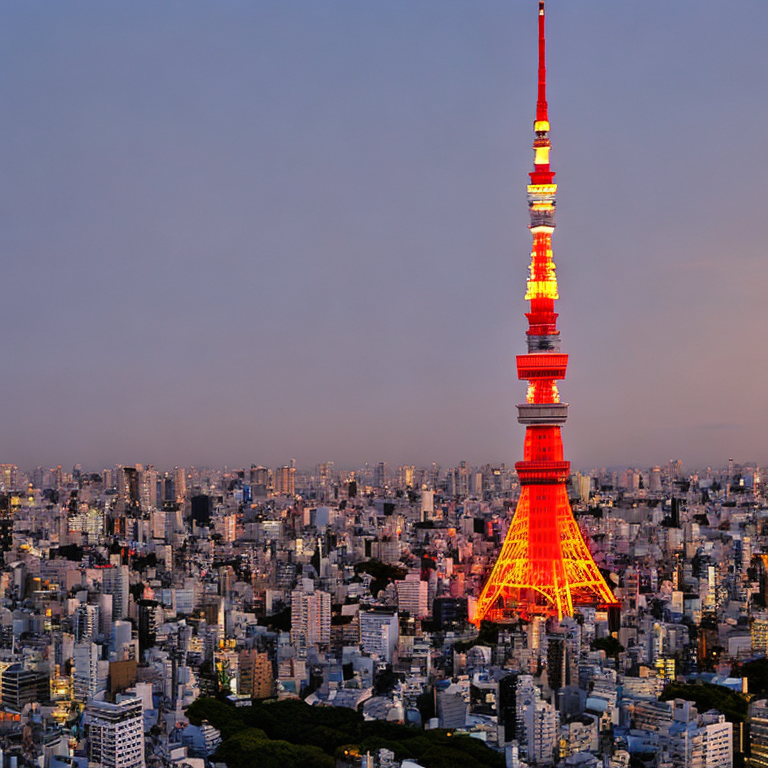

In [10]:
from diffusers.training_utils import set_seed

set_seed(12345)

prompt = "tokyo tower at sunset"
output = pipe(prompt, height=height, width=width, num_inference_steps=50).images[0]
output

In [ ]:
set_seed(2023)

prompt = "fall, temple, japan"
output = pipe(prompt, height=height, width=width, num_inference_steps=50).images[0]
output

In [ ]:
set_seed(2023)

prompt = "lake and mount fuji"
output = pipe(prompt, height=height, width=width, num_inference_steps=50).images[0]
output